# **Functional API**

## 1.환경준비

### (1) 라이브러리 로딩

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, Model
from keras.layers import Input, Dense, concatenate
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [11]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [12]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## 2.데이터 준비

### (1) 데이터 준비

In [13]:
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (2) 가변수화

In [14]:
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (3) 데이터분할

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (4) Scaling

In [16]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링 : Sequential API vs Function API

In [17]:
nfeatures = x_train.shape[1]
nfeatures

18

### (1) Sequential

In [18]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423 (1.65 KB)

 Trainable params: 423 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

### (2) Functional

In [19]:
clear_session()

il = Input(shape=(nfeatures, ))
hl1 = Dense(18, activation='relu')(il)
hl2 = Dense(4, activation='relu')(hl1)
ol = Dense(1)(hl2)

model = Model(inputs = il, outputs = ol)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 18)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423 (1.65 KB)

 Trainable params: 423 (1.65 KB)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [20]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

hist = model.fit(x_train, y_train, epochs = 50, validation_split= 0.2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 68.8605 - val_loss: 36.1524
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 32.2343 - val_loss: 13.1974
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.5044 - val_loss: 12.8186
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.9242 - val_loss: 11.3854
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8732 - val_loss: 8.8375
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.1274 - val_loss: 8.4332
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6477 - val_loss: 8.6017
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6150 - val_loss: 8.4192
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.2762 - val_loss: 7.7902
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.5601 - val_loss: 7.6348
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1532 - val_loss: 7.5525
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.8171 - val_loss: 7.

* 학습곡선

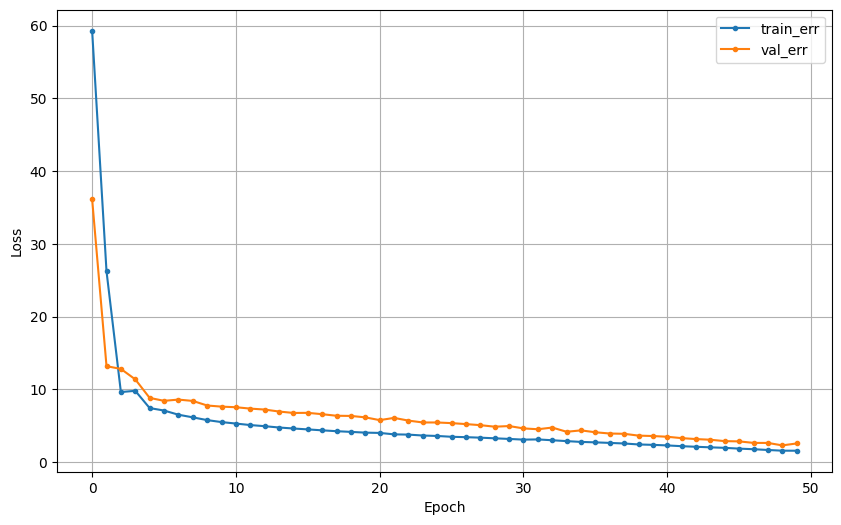

In [21]:
dl_history_plot(hist)

* 검증

In [22]:
pred = model.predict(x_val)

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.624014566581866
1.2533634495735169


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### (3) 실습1
다음의 Sequential API 코드를 Functional API로 변환해서 수행해 봅시다.

In [23]:
clear_session()

model = Sequential([Input(shape = (nfeatures, )),
                    Dense(18, activation = 'relu' ),
                    Dense(4, activation='relu') ,
                    Dense(4, activation='relu') ,
                    Dense(1) ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 18)                  │             342 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              76 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443 (1.73 KB)

 Trainable params: 443 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

### (4) 실습2
다음 구조로 모델링 하시오. 단 Functional API 로 코딩하시오.

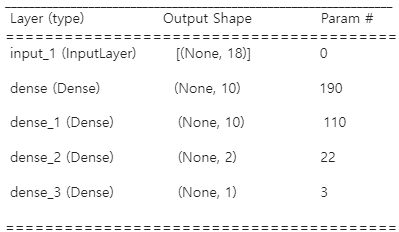

## 4.다중 입력


### (1) 입력 준비

* 아래 코드는 다중 입력 모델을 연습하기 위해 임의로 변수를 구분
* 성능과 상관없이 다중 입력 연습을 위한 것입니다.

#### 1) 기본 전처리

In [24]:
# 데이터 분할 : x, y
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
cat_cols = ['ShelveLoc', 'Education', 'US', 'Urban']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [25]:
x_train.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,US_Yes,Urban_Yes
0,0.387755,0.767677,0.172414,0.248497,0.402685,0.545455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.204082,0.252525,0.379310,0.515030,0.557047,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.520408,0.454545,0.103448,0.967936,0.637584,0.363636,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.234694,0.333333,0.310345,0.847695,0.436242,0.363636,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.673469,1.000000,0.241379,0.539078,0.825503,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 2) 입력 나누기

* 입력1 : 판매 관련 정보 : Advertising, Price, ShelveLoc, US, Urban, CompPrice
* 입력2 : 외부 환경 정보 : Income, Population, Age, Education


In [26]:
# 입력1
in_col = ['Advertising','Price','CompPrice','ShelveLoc_Good','ShelveLoc_Medium','US_Yes','Urban_Yes']
x_train1 = x_train[in_col]
x_val1 = x_val[in_col]
x_val1.head()

,Advertising,Price,CompPrice,ShelveLoc_Good,ShelveLoc_Medium,US_Yes,Urban_Yes
0,0.310345,0.510067,0.448980,0.0,0.0,1.0,0.0
1,0.655172,0.651007,0.448980,0.0,1.0,1.0,1.0
2,0.241379,0.630872,0.551020,0.0,1.0,1.0,1.0
3,0.206897,0.731544,0.540816,0.0,0.0,1.0,1.0
4,0.000000,0.563758,0.500000,0.0,0.0,0.0,1.0


In [27]:
# 입력2
x_train2 = x_train.drop(in_col, axis = 1)
x_val2 = x_val.drop(in_col, axis = 1)
x_val2.head()

,Income,Population,Age,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,0.575758,0.280561,0.018182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070707,0.611222,0.745455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.262626,0.160321,0.400000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.070707,0.801603,0.854545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.777778,0.326653,0.545455,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### (2) 다중 입력 모델링

In [28]:
nfeatures1 = x_train1.shape[1]
nfeatures2 = x_train2.shape[1]

print(nfeatures1, nfeatures2)

7 11


In [29]:
# 모델 구성
input_1 = Input(shape=(nfeatures1,), name='input_1')
input_2 = Input(shape=(nfeatures2,), name='input_2')

# 첫 번째 입력을 위한 레이어
hl1_1 = Dense(10, activation='relu')(input_1)

# 두 번째 입력을 위한 레이어
hl1_2 = Dense(20, activation='relu')(input_2)

# 두 히든레이어 결합
cbl = concatenate([hl1_1, hl1_2])

# 추가 히든레이어
hl2 = Dense(8, activation='relu')(cbl)

# 출력 레이어
output = Dense(1)(hl2)

# 모델 선언
model = Model(inputs = [input_1, input_2], outputs = output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)      │ (None, 7)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_2 (InputLayer)      │ (None, 11)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │             80 │ input_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 20)             │            240 │ input_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 30)             │              0 │ dense_4[0][0],         │
│                           │                        │                │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 8)              │            248 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │              9 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# 컴파일
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

# 학습
hist = model.fit([x_train1, x_train2], y_train, epochs=50, validation_split=.2).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 59.8382 - val_loss: 39.8296
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.3155 - val_loss: 10.1281
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9291 - val_loss: 15.2313
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3507 - val_loss: 8.9186
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4943 - val_loss: 8.4564
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0095 - val_loss: 9.4775
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6989 - val_loss: 8.0815
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.3635 - val_loss: 7.4324
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1077 - val_loss: 7.5877
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6309 - val_loss: 7.2348
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3057 - val_loss: 6.7297
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1245 - val_loss: 6.3263
Epoch 

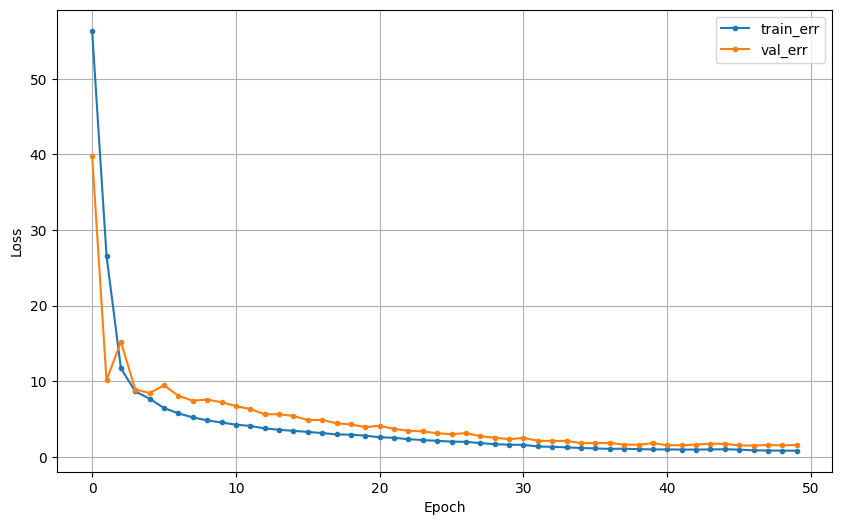

In [31]:
dl_history_plot(hist)

* 검증

In [32]:
pred = model.predict([x_val1, x_val2])

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1.267950447849293
1.0260107919573784


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5.실습

* 보스턴 집값 데이터를 이용해서 입력을 2개로 나누고 모델링을 수행하시오.
* 입력을 나눌 때, 임의로 나눠도 좋고, 어떠한 관점을 가지고 나눠도 좋습니다.



![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율 |
|	indus	|	산업단지 면적비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	고속도로 진입로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


### (1) 데이터 준비

* 데이터 로딩

In [33]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


* 기본 전처리

In [34]:
# 데이터 분할 : x, y
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 데이터 분할 : train, val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

x_train = pd.DataFrame(x_train, columns=x.columns)
x_val = pd.DataFrame(x_val, columns=x.columns)

In [35]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.001880,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,0.480684
1,0.007265,0.200,0.128666,0.0,0.390947,0.748994,0.511843,0.158445,0.173913,0.146947,0.042553,0.039459
2,0.000473,0.250,0.161290,0.0,0.084362,0.606630,0.315139,0.388391,0.130435,0.179389,0.680851,0.098234
3,0.015293,0.000,0.281525,0.0,0.314815,0.412340,0.939238,0.282207,0.130435,0.229008,0.893617,0.575883
4,0.091277,0.000,0.646628,0.0,0.674897,0.610845,0.923790,0.108576,1.000000,0.914122,0.808511,0.433499


### (2) 입력 나누기

In [36]:
# 입력1 : 주택과 직접 관련이 있는 변수들
in_col = [ ]

in_col = [] # 안에 변수들 넣기
x_train1 = x_train[in_col]
x_val1 = x_val[in_col]
x_val1.head()

In [37]:
# 입력2 : 주택과 간접 관련이 있는 변수들

nfeatures1 = x_train1.shape[1]
nfeatures2 = x_train2.shape[1]

print(nfeatures1, nfeatures2)


### (3) 다중 입력 모델링

* 모델 선언

In [38]:
# 모델 구성
input_1 = Input(shape=(nfeatures1,), name='input_1')
input_2 = Input(shape=(nfeatures2,), name='input_2')

# 첫 번째 입력을 위한 레이어
hl1_1 = Dense(10, activation='relu')(input_1)

# 두 번째 입력을 위한 레이어
hl1_2 = Dense(20, activation='relu')(input_2)

# 두 히든레이어 결합
cbl = concatenate([hl1_1, hl1_2])

# 추가 히든레이어
hl2 = Dense(8, activation='relu')(cbl)

# 출력 레이어
output = Dense(1)(hl2)

# 모델 선언
model = Model(inputs = [input_1, input_2], outputs = output)

model.summary()

* 컴파일 및 학습

In [39]:
# 컴파일
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

# 학습
hist = model.fit([x_train1, x_train2], y_train, epochs=50, validation_split=.2).history

In [40]:
# 학습곡선 확인
dl_history_plot(hist)

* 검증

In [40]:
pred = model.predict([x_val1, x_val2])

print(mean_squared_error(y_val, pred, squared = False))
print(mean_absolute_error(y_val, pred))